In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import os

In [ ]:
Sh= pd.read_csv("sms_manual.csv")

In [ ]:
Sh.head()

,Unnamed: 0,_protocol,_address,_date,_type,_subject,_toa,_sc_toa,_service_center,_read,...,_date_sent,_sub_id,_readable_date,_contact_name,length,text,label,financial,important,spam
0,0,0,+918310733183,1509032968509,1,NaN,NaN,NaN,9.198451e+11,1,...,1509032964000,1,"Oct 26, 2017 9:19:28 PM",Chimya,146,You 1 missed call 918310733183 Last call 26...,others,0,0,0
1,1,0,59039004,1509034252105,1,NaN,NaN,NaN,9.182999e+11,1,...,1509034247000,1,"Oct 26, 2017 9:40:52 PM",(Unknown),99,WhatsApp code 397564 You also tap link verify...,important,0,1,0
2,2,59,Airtel,1509037408272,1,NaN,NaN,NaN,9.198451e+11,1,...,1509037401000,1,"Oct 26, 2017 10:33:28 PM",(Unknown),190,Please open following link get manual instruct...,spam,0,0,1
3,3,59,Airtel,1509037425141,1,NaN,NaN,NaN,9.198451e+11,1,...,1509037402000,1,"Oct 26, 2017 10:33:45 PM",(Unknown),334,To enjoy fastest Airtel data speeds smartphone...,important,1,1,0
4,4,0,AX-RECHRG,1509065238723,1,NaN,NaN,NaN,9.198451e+11,1,...,1509065233000,1,"Oct 27, 2017 6:17:18 AM",(Unknown),155,Congrats new 4G handset Exclusive offer Rs399...,spam,1,0,1


In [ ]:
df3=Sh[["label","text"]]

In [ ]:
category_codes = {
    'financial': 0,
    'important': 1,
    'spam': 2,
    'others':3,
}

In [ ]:
df3['Category_Code'] = df3['label']
df3 = df3.replace({'Category_Code':category_codes})

C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,label,text,Category_Code
0,others,You 1 missed call 918310733183 Last call 26...,3
1,important,WhatsApp code 397564 You also tap link verify...,1
2,spam,Please open following link get manual instruct...,2
3,important,To enjoy fastest Airtel data speeds smartphone...,1
4,spam,Congrats new 4G handset Exclusive offer Rs399...,2
5,others,Enjoy double delight Get double occupancy roo...,3
6,important,Your Google verification code 743610,1
7,important,46322 one time password proceed PhonePe It va...,1
8,important,Your One Time Password OTP Syndicate Bank on...,1
9,financial,You ve received Rs50 cashback PhonePe wallet f...,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['text'],
                                                    df3['Category_Code'],
                                                    test_size=0.15,
                                                    random_state=8)

In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(df3.dtypes)
#df3['label'] = df3['label'].values.astype('|S')
#x = df3['text'].values.astype('U')
#print(df3.dtypes)

label            object
text             object
Category_Code     int64
dtype: object
label            object
text             object
Category_Code     int64
dtype: object


dtype('<U690')

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train.values.astype('U')).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test.values.astype('U')).toarray()
labels_test = y_test
print(features_test.shape)

(6684, 300)
(1180, 300)


In [ ]:
print(features_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.29419576 ... 0.         0.         0.        ]]


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'financial' category:
  . Most correlated unigrams:
. Ac
. debited
. Avl
. Bal
. INR
  . Most correlated bigrams:
. Avl Bal
. Your Ac

# 'important' category:
  . Most correlated unigrams:
. Do
. online
. one
. code
. OTP
  . Most correlated bigrams:
. Avl Bal
. Your Ac

# 'others' category:
  . Most correlated unigrams:
. ಯಲ
. ಟರ
. ಮತ
. ಅನ
. ಜನ
  . Most correlated bigrams:
. Dear Customer
. You missed

# 'spam' category:
  . Most correlated unigrams:
. Offer
. balance
. recharge
. dial
. Dial
  . Most correlated bigrams:
. high speed
. balance validity



In [ ]:
bigrams

['28 days',
 'Dear Customer',
 'ಯತ ಜನ',
 'ಅನ ವರ',
 'ವರ ದಕ',
 'ಗಳ ಯಲ',
 'ದಕ http',
 'ರಸ ಯತ',
 'ಕಡ ತದ',
 'ಟರ ಕಡ',
 'ಸಕ ಜನ',
 '1991 ಡಯಲ',
 'tinyjiocomDataBooster ಅನ',
 'ಯಲ 1991',
 'ತದ ಟರ',
 'ಡಲ ಮತ',
 'ಟರ ಡಲ',
 'ಮತ ಟರ',
 'ಅನ ರಸ',
 'ಟರ ಅನ',
 'ಹಚ ಚಲ',
 'ದರ ಇನ',
 'ಮತ ಬಳಕ',
 'ಇನ ನಷ',
 'ಪತ ಹಚ',
 'ಯನ ಪತ',
 'ಮಜ ಯನ',
 'ಅನ ಮಜ',
 '1299 ಅನ',
 'ಚಲ 1299',
 'ನಷ ಯಲ',
 'GB ಅನ',
 '50 ರಷ',
 'ಖಡ 50',
 '1991ಗ ಡಯಲ',
 'ಯಲ 1991ಗ',
 'ಗಳ ಬಗ',
 '9220092200 Tollfree',
 'BLOCKUPI 9220092200',
 'You missed',
 'ಬಗ ಯಲ',
 'ರಸ ಜನ',
 'ಅನ ಬಳಸ',
 'http tinyjiocomMyJioVideo',
 'ಟರ ಖಡ',
 'ಬಳಕ ಯನ',
 'ವಹ ದರ',
 'ಬಳಸ 6361924355',
 '6361924355 ಇಷ',
 'ಇಷ ಟರ',
 'ಯನ ವಹ',
 'Tollfree 18002083333',
 '18002083333 180030113333',
 'suspicious send',
 'XXXXXXXX055690 debited',
 'send BLOCKUPI',
 'find txn',
 'txn suspicious',
 'If find',
 'ಮತ ಅತ',
 'ಅತ ಕರ',
 'ಕರ ಷಕ',
 'ಷಕ ಜನ',
 'ವರಗಳ ಮತ',
 'ಜನ ವರಗಳ',
 'ಜನ ಗಳ',
 'XXX5690 credited',
 'okaxis linked',
 'XXXXXXXX055690 credited',
 'XXX5690 debited',
 'SYN INR',
 '15 GB',
 'credited INR',
 'shrey

In [ ]:
import pickle

In [ ]:
# X_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)

# X_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)

# y_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)

# y_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)

# df
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//df.pickle', 'wb') as output:
    pickle.dump(df3, output)

# features_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)

# TF-IDF object
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

In [ ]:
#importing libraries
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading Data.

In [ ]:
# Dataframe
path_df = "C:\\Users\\Sanjana Ashtaputre\\Downloads//df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "C:\\Users\\Sanjana Ashtaputre\\Downloads//features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "C:\\Users\\Sanjana Ashtaputre\\Downloads//features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

Let's check the dimension of our feature vectors:

In [ ]:
print(features_train.shape)
print(features_test.shape)

(6684, 300)
(1180, 300)


Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [ ]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

n_estimators = number of trees in the forest.

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

Randomized Search Cross Validation
We first need to define the grid:

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [ ]:
# First create the base model to tune
print(features_train,labels_train)
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=1,
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.38326958 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 3545    1
3340    3
854     0
7157    1
5131    0
3684    2
4136    3
6075    3
5602    2
6105    1
570     0
5352    1
755     0
6263    2
7524    2
2011    0
492     0
2439    0
6158    1
6497    2
6326    2
1585    0
3886    0
7554    0
7198    0
121     3
2083    2
3562    0
361     3
7206    0
       ..
6584    3
4445    3
7270    2
270     0
3602    1
7483    0
3426    0
5469    0
6287    0
1085    1
6025    2
4365    0
620     0
4763    0
458     0
4211    2
4924    2
5205    0
5997    0
2096    0
3775    3
5480    3
6995    0
2184    3
5082  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 19.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9015559545182525


After that, we can do a more exhaustive search centered in those values:

In [ ]:
# Create the parameter grid based on the results of random search
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 14.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [5, 10, 15], 'n_estimators': [800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9031429434874585


Let's save the model in best_rfc:

In [ ]:
best_rfc = grid_search.best_estimator_

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)


We now know the best random forest model. Let's fit it and see how it performs:

Model fit and performance
Now, we can fit the model to our training data:

In [ ]:

best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

And get the predictions:

In [ ]:

rfc_pred = best_rfc.predict(features_test)

The conditional class probabilities can be obtained by typing:

rfc_pred = best_rfc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:



Training accuracy

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.9500299222022741


In [ ]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.9050847457627119


In [ ]:
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       571
           1       0.98      0.90      0.94       104
           2       0.93      0.90      0.92       242
           3       0.79      0.93      0.86       263

   micro avg       0.91      0.91      0.91      1180
   macro avg       0.91      0.91      0.91      1180
weighted avg       0.91      0.91      0.91      1180



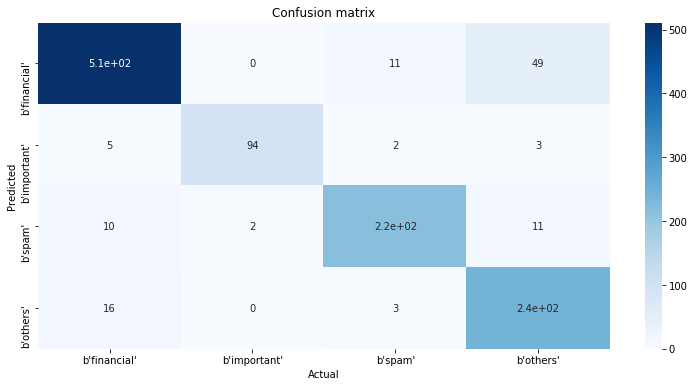

In [ ]:
aux_df = df[['label', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['label'].values,
            yticklabels=aux_df['label'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9050847457627119

In [ ]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.9050847457627119

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.95003,0.905085


Let's save the model and this dataset:

In [ ]:
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)

with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

.....................................................

In [ ]:
import pandas as pd
df = pd.read_csv('sms_manual.csv')

In [ ]:
df.drop(['_protocol','_date','_subject','_toa','_sc_toa','_status','_locked','_date_sent','_service_center','_type','_contact_name'],axis=1, inplace = True)
df.head()

,Unnamed: 0,_address,_read,_sub_id,_readable_date,length,text,label,financial,important,spam
0,0,+918310733183,1,1,"Oct 26, 2017 9:19:28 PM",146,You 1 missed call 918310733183 Last call 26...,others,0,0,0
1,1,59039004,1,1,"Oct 26, 2017 9:40:52 PM",99,WhatsApp code 397564 You also tap link verify...,important,0,1,0
2,2,Airtel,1,1,"Oct 26, 2017 10:33:28 PM",190,Please open following link get manual instruct...,spam,0,0,1
3,3,Airtel,1,1,"Oct 26, 2017 10:33:45 PM",334,To enjoy fastest Airtel data speeds smartphone...,important,1,1,0
4,4,AX-RECHRG,1,1,"Oct 27, 2017 6:17:18 AM",155,Congrats new 4G handset Exclusive offer Rs399...,spam,1,0,1


In [ ]:
category_codes = {
    'financial': 0,
    'important': 1,
    'spam': 2,
    'others':3,
}
df['Category_Code'] = df['label']
df = df.replace({'Category_Code':category_codes})

In [ ]:
from io import StringIO
col = ['label', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['label', 'text']
df['category_codes'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_codes']].drop_duplicates().sort_values('category_codes')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_codes', 'label']].values)
df.head()

,label,text,category_codes
0,others,You 1 missed call 918310733183 Last call 26...,0
1,important,WhatsApp code 397564 You also tap link verify...,1
2,spam,Please open following link get manual instruct...,2
3,important,To enjoy fastest Airtel data speeds smartphone...,1
4,spam,Congrats new 4G handset Exclusive offer Rs399...,2


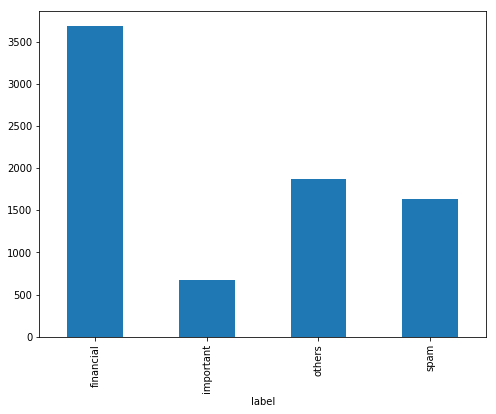

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_codes
features.shape

(7862, 4842)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label, category_codes in sorted(category_to_id.items()):
                                  features_chi2 = chi2(features, labels == category_codes)
                                  indices = np.argsort(features_chi2[0])
                                  feature_names = np.array(tfidf.get_feature_names())[indices]
                                  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
                                  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
                                  print("# '{}':".format(Product))
                                  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
                                  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'spam':
  . Most correlated unigrams:
. ac
. inr
  . Most correlated bigrams:
. avl bal
. bal inr
# 'spam':
  . Most correlated unigrams:
. code
. otp
  . Most correlated bigrams:
. password otp
. time password
# 'spam':
  . Most correlated unigrams:
. ಟರ
. ಜನ
  . Most correlated bigrams:
. available calls
. dear customer
# 'spam':
  . Most correlated unigrams:
. know
. dial
  . Most correlated bigrams:
. balance validity
. high speed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["SYN INR 4000 debited AC No  5690 02022018 1640for POS txn 00218923470000000218923PAYTM Avl Bal1889085  Helpline 18004250585"])))
print(clf.predict(count_vect.transform(["Your One Time Password  OTP  Syndicate Bank online transaction 9862  Do disclose one"])))
print(clf.predict(count_vect.transform(["Hi how are you?"])))
print(clf.predict(count_vect.transform(["Book OYO minimum 35  Bangalore  Grab deal  View offer  wwwgsims  MK4pNiWu9Uw Call 7065444454 STOP  T  C"])))
print(clf.predict(count_vect.transform(["inr 500 debited yo account"])))

['financial']
['important']
['others']
['spam']
['financial']


C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-package

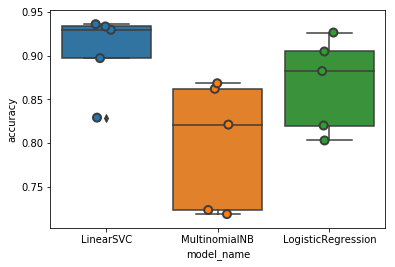

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.904883
LogisticRegression    0.867234
MultinomialNB         0.798811
Name: accuracy, dtype: float64

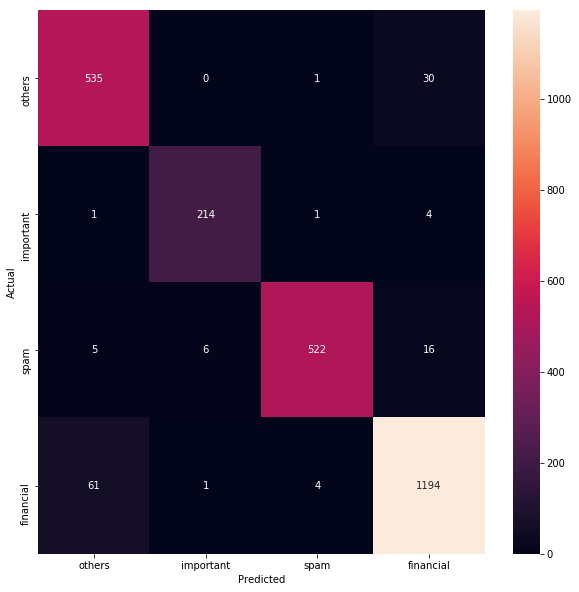

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

              precision    recall  f1-score   support

      others       0.89      0.95      0.92       566
   important       0.97      0.97      0.97       220
        spam       0.99      0.95      0.97       549
   financial       0.96      0.95      0.95      1260

   micro avg       0.95      0.95      0.95      2595
   macro avg       0.95      0.95      0.95      2595
weighted avg       0.95      0.95      0.95      2595



In [ ]:
print(clf.predict(count_vect.transform(["SYN INR 4000 debited AC No  5690 02022018 1640for POS txn 00218923470000000218923PAYTM Avl Bal1889085  Helpline 18004250585"])))
print(clf.predict(count_vect.transform(["Your One Time Password  OTP  Syndicate Bank online transaction 9862  Do disclose one"])))
print(clf.predict(count_vect.transform(["Hi how are you?"])))
print(clf.predict(count_vect.transform(["Book OYO minimum 35  Bangalore  Grab deal  View offer  wwwgsims  MK4pNiWu9Uw Call 7065444454 STOP  T  C"])))
print(clf.predict(count_vect.transform(["inr 500 debited yo account"])))

['financial']
['important']
['others']
['spam']
['financial']
